## POORNIMA GADAMSETTY
## Oct17 2018

# EMPLOYEE RETENTION Problem Goal: 

* Predict when employees are going to quit by understanding the main drivers of employee churn.
* What are the main factors that drive employee churn? Do they make sense? Explain your findings.
* What might you be able to do for the company to address employee Churn, what would be follow-up actions?
* If you could add to this data set just one variable that could help explain employee churn, what would that be?



** Import libraries **


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

** Load data **

In [341]:
df = pd.read_csv('employee_retention_data.csv')

In [328]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
employee_id    24702 non-null float64
company_id     24702 non-null int64
dept           24702 non-null object
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null object
quit_date      13510 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ MB


In [330]:
df.describe()

,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478
std,288909.026101,2.700011,8.089520,76058.184573
min,36.000000,1.000000,1.000000,17000.000000
25%,250133.750000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753137.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,99.000000,408000.000000


** Checking for unique employees and other columns **

so there is no repetition in mnumber of employees

In [336]:
print(len(df))
print('Unique employee id ', df['employee_id'].nunique())
print('Unique depts ',df['dept'].nunique())
print('Unique salary ',df['salary'].nunique())
print('Unique seniority',df['seniority'].nunique())
print('Unique company id ',df['company_id'].nunique())

24702
Unique employee id  24702
Unique depts  6
Unique salary  367
Unique seniority 31
Unique company id  12


** Checkinf for null values **

Only quit date column has null values. This corresponds to number of emplyees who have not quit

In [16]:
# Looking for null values in the data
df.isnull().sum()

employee_id        0
company_id         0
dept               0
seniority          0
salary             0
join_date          0
quit_date      11192
dtype: int64

** Number of employees who have quit so far **

Looks like more people have quit

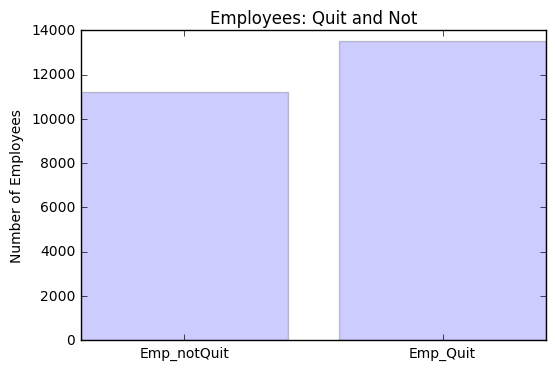

In [337]:
Emp_notQuit=df['quit_date'].isnull().sum()
Emp_Quit= df['employee_id'].count()-Emp_notQuit
# print('Number of employees who have not quit: %d' %Emp_notQuit)
# print('Number of employees who have quit: %d' %Emp_Quit)
labels = ('Emp_notQuit','Emp_Quit')
index = np.arange(len(objects))
plt.bar(index, [Emp_notQuit,Emp_Quit], align='center', alpha=0.2)
plt.xticks(index, labels)
plt.ylabel('Number of Employees')
plt.title('Employees: Quit and Not')
plt.show()
 

** Creating Quit Column  and days emplyed based on start and join dates **

** 1)  Creating quit column based on NA value in quit_date **

In [343]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [344]:
df['quit']=df['quit_date'].isnull().astype(int)
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,0
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN,1
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,0


** 2) Converting start date and end date into years **

In [340]:
from datetime import datetime 

NumDays=[]
for i in range (len(df)):
    a = datetime.strptime(df['join_date'][i], date_format)
    if isinstance(df['quit_date'][i], str):
        b = datetime.strptime(df['quit_date'][i], date_format)
    else:
        b = datetime.strptime(current_date, date_format)
    
    NumDays.append((b-a).days)
    
df['years_worked']=np.asarray(NumDays)/365   
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit,years_worked
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,0,1.602740
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,0,0.931507
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN,1,1.167123
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,0,1.065753
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,0,2.849315


** Distribution of Quitting Vs salary **

Here we see that more employees in 100K to 200K salary range quit more 

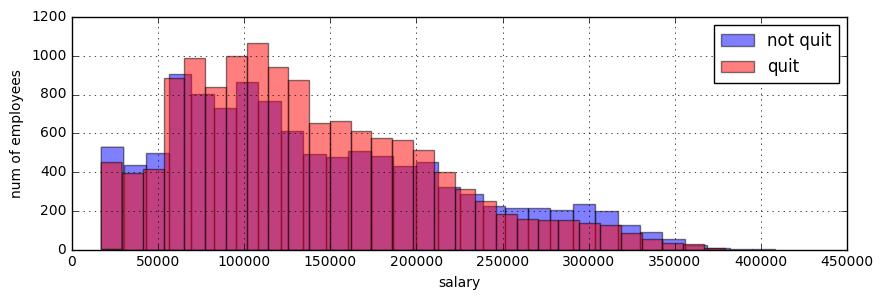

In [269]:
plt.figure(figsize=(10,3))
df[df['quit']==1]['salary'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not quit')
df[df['quit']==0]['salary'].hist(alpha=0.5,color='red',
                                              bins=30,label='quit')
plt.legend()
plt.xlabel('salary')
plt.ylabel('num of employees')
plt.show()

** Distribution of Quitting Vs years worked **

Here we see that more employees in 1-2 year range quit more 

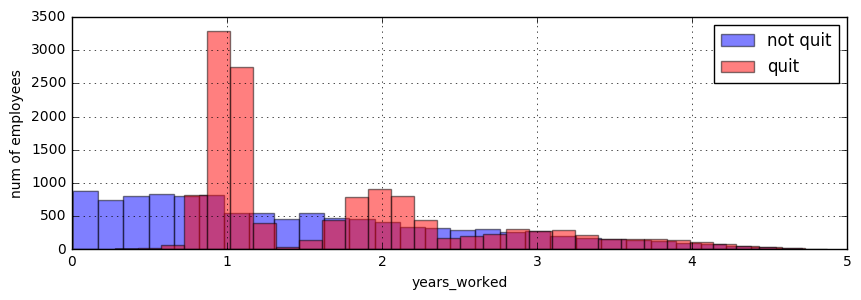

In [268]:
plt.figure(figsize=(10,3))
df[df['quit']==1]['years_worked'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not quit')
df[df['quit']==0]['years_worked'].hist(alpha=0.5,color='red',
                                              bins=30,label='quit')
plt.legend()
plt.xlabel('years_worked')
plt.ylabel('num of employees')
plt.show()

** Distribution of Quitting Vs Seniority **

** 1) Here we see seniority has some outliers **

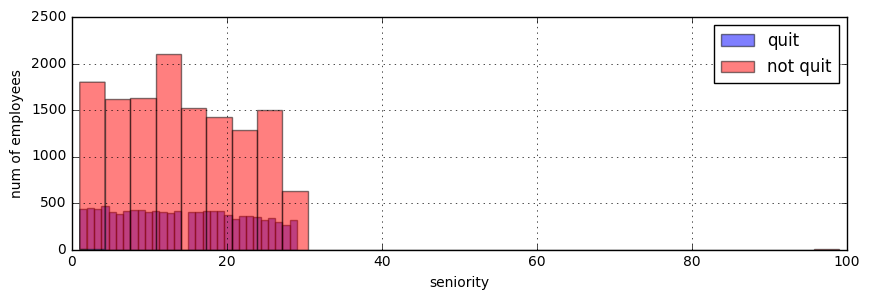

In [223]:
plt.figure(figsize=(10,3))
df[df['quit']==1]['seniority'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not quit')
df[df['quit']==0]['seniority'].hist(alpha=0.5,color='red',
                                              bins=30,label='quit')
plt.legend()
plt.xlabel('seniority')
plt.ylabel('num of employees')
plt.show()

** 2) Impute the Seniority coloumn outliers with median **

In [247]:
# mark zero values as missing or NaN
df['seniority']=df['seniority'].replace(df[(df['seniority']>30)]['seniority'], np.NaN)
# fill missing values with mean column values
df['seniority'].fillna(df['seniority'].median(), inplace=True)
# count the number of NaN values in each column
print(df['seniority'].isnull().sum())

0


**  3) Distribution of qutting vs seniority again **

Here we see that people with more than 5 years of seniority quit more

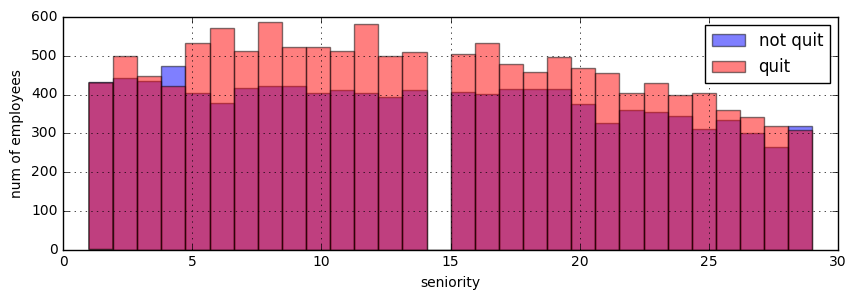

In [270]:
plt.figure(figsize=(10,3))
df[df['quit']==1]['seniority'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not quit')
df[df['quit']==0]['seniority'].hist(alpha=0.5,color='red',
                                              bins=30,label='quit')
plt.legend()
plt.xlabel('seniority')
plt.ylabel('num of employees')
plt.show()

**  Distribution of  quitting vs department **

Here we see that employees in customer service, marketing and sales are quitting more

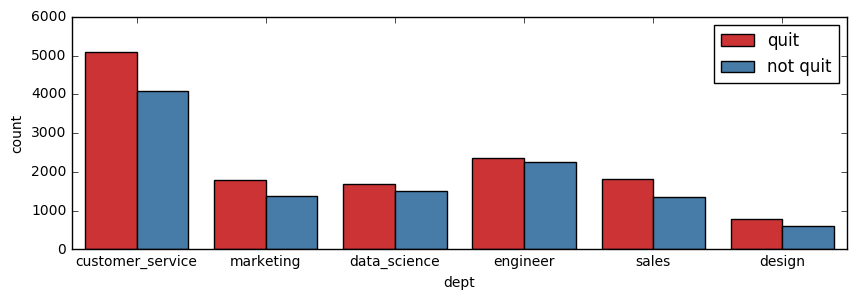

In [279]:
plt.figure(figsize=(10,3))
sns.countplot(x='dept',hue='quit',data=df,palette='Set1')
plt.legend(('quit', 'not quit'))
plt.show()

** plot of dept vs salary and quitting **

Here we see that employees in customer service, marketing and sales are quitting more as they have salaries lower than 200K
Data scenie and engineers quit more int he salary range of 150K- 250K

C:\Users\PG\Anaconda3\lib\site-packages\scipy\stats\stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


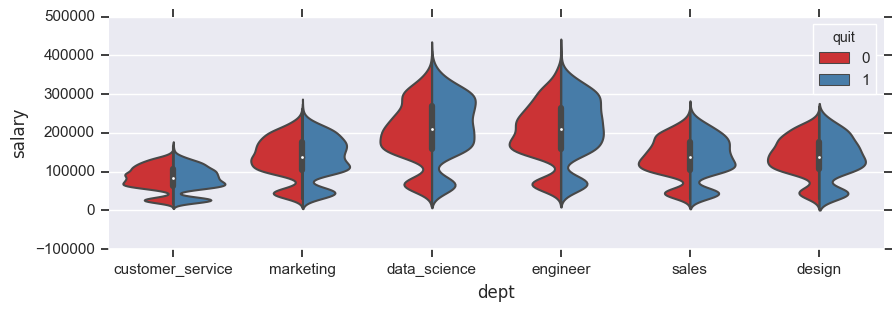

In [406]:
plt.figure(figsize=(10,3))

quit = (df.quit == 0)
not_quit = (df.quit == 1)

sns.set(palette="Set1")
sns.violinplot(x="dept", y="salary", hue="quit",split=True,data=df)
sns.despine(left=True)
# plt.legend(('quit', 'not quit'))

plt.show()

**  Distribution of  quitting vs company ID **

Just shows that employees are quitting in all companies

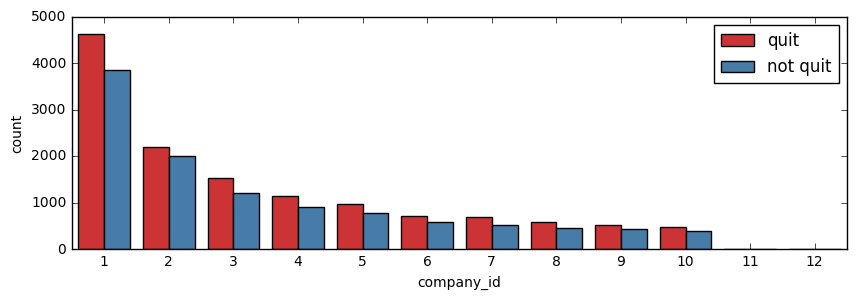

In [321]:
plt.figure(figsize=(10,3))
sns.countplot(x='company_id',hue='quit',data=df,palette='Set1')
plt.legend(('quit', 'not quit'))
plt.show()

** Plot of company id vs salary and quitting **

All companies have more quitting for employees between the 50k-200k range. 
Here we see that employees in company 12 is in trouble with low salaraiesa and more quitting


C:\Users\PG\Anaconda3\lib\site-packages\scipy\stats\stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


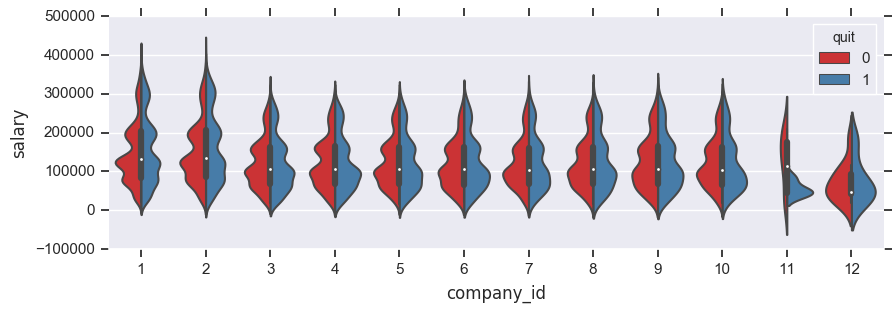

In [408]:
plt.figure(figsize=(10,3))
quit = (df.quit == 0)
not_quit = (df.quit == 1)

sns.set(palette="Set1")
sns.violinplot(x="company_id", y="salary", hue="quit",split=True,data=df)
sns.despine(left=True)
plt.show()

** Creating  Final data **



** 1)  changing dept to integers using speciifc ocde for each department **

In [418]:
df.dept = pd.Categorical(df.dept)
# Now the data look similar but are stored categorically. To capture the category codes:
df['dept_code'] = df.dept.cat.codes
df.head()

,company_id,dept,seniority,salary,quit,dept_code
0,7,customer_service,28,89000.0,0,0
1,7,marketing,20,183000.0,0,4
2,4,marketing,14,101000.0,1,4
3,7,customer_service,20,115000.0,0,0
4,2,data_science,23,276000.0,0,1


** 2) removing columns that we dont need **

In [421]:
# df.pop('quit_date')
# df.pop('join_date')
# df.pop('employee_id')
# df.pop('dept')

df.head()

,company_id,seniority,salary,quit,dept_code
0,7,28,89000.0,0,0
1,7,20,183000.0,0,4
2,4,14,101000.0,1,4
3,7,20,115000.0,0,0
4,2,23,276000.0,0,1


In [422]:
final_data=df

** test train split **

In [425]:
import sklearn
from sklearn.cross_validation import train_test_split

X = final_data.drop('quit',axis=1)
y = final_data['quit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [427]:
X.head()

,company_id,seniority,salary,dept_code
0,7,28,89000.0,0
1,7,20,183000.0,4
2,4,14,101000.0,4
3,7,20,115000.0,0
4,2,23,276000.0,1


In [461]:
y_train.head()

24070    0
13630    0
2346     1
2557     0
21000    1
Name: quit, dtype: object

** Training the Random Forest model **

In [477]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,list(y_train.values))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

** prediction and metrics **

In [478]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = rfc.predict(X_test)
print(classification_report(list(y_test.values),predictions))
print(confusion_matrix(list(y_test.values),predictions))

             precision    recall  f1-score   support

          0       0.55      0.60      0.57      4028
          1       0.46      0.41      0.43      3383

avg / total       0.51      0.51      0.51      7411

[[2427 1601]
 [2011 1372]]


In [481]:
cm=confusion_matrix(list(y_test.values),predictions)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("Normalized confusion matrix:")
cm

Normalized confusion matrix:


array([[0.60253227, 0.39746773],
       [0.5944428 , 0.4055572 ]])

In [494]:
from sklearn.metrics import accuracy_score
accuracy_score(list(y_test.values),predictions)

0.5435163945486439

** Conclusion: **


Overall, the company needs to focus on a range of factors to increase employee retention. A generalized solution cannot be applied to all departments or companies. 
It is noticed that employees in 50K to 200K , within 1-2 years of employments, and more than 5 years of seniority quit more.
Employees in customer service, marketing and sales with salaries lower than 200K quit more 
Employees in Data scenie and Engineering with salaries in 150K- 250K quit more
Also, company 12 in speciifc, has trouble with low salories and more quitting

Running a random forest classifier on the the final data gives an accuracy of 54%
